## Convolutional Neural Network 



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [4]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import warnings
from tensorflow.keras.preprocessing import image
import os
import PIL
from PIL import Image
from PIL import UnidentifiedImageError  # Import the UnidentifiedImageError
import imghdr

warnings.filterwarnings('ignore')


C:\Users\abdur\AppData\Local\Temp\ipykernel_10864\4274543293.py:12: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [11]:
# # if you are using google colab for this task you can mount your GoogleDrive as follows: 
# from google.colab import drive
# drive.mount('/content/drive/')

# # After running this cell you should enter the authorization code from your Google account

In [5]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = 'train'
val =   'val'
test =  'test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 
# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = 1000
# validation set size 
nb_validation_samples = 2000
# test set size
nb_test_samples = 400

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [7]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [8]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' instead of 'binary'
)

val_generator = val_datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' instead of 'binary'
)


Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [9]:
# Create a Sequential model
model = Sequential()

# 1: Convolutional Layer with 16 neurons and a 3x3 filter
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))

# 2: MaxPooling Layer
model.add(MaxPooling2D((2, 2)))

# 3: Convolutional Layer with 32 neurons and a 3x3 filter
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# 4: MaxPooling Layer
model.add(MaxPooling2D((2, 2)))

# 5: Convolutional Layer with 64 neurons and a 3x3 filter
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# 6: MaxPooling Layer
model.add(MaxPooling2D((2, 2)))

# 7: Flattening Layer
model.add(Flatten())

# 8: Fully Connected Dense Layer with 64 neurons and ReLU activation
model.add(Dense(64))
model.add(Activation('relu'))

# 9: Dropout Layer to prevent overfitting
model.add(Dropout(0.5))

# 10: Fully Connected Dense Layer with 1 neuron and Sigmoid activation for binary classification
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

# Define the number of epochs
num_epochs = 10

# Train the model using fit_generator
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=num_epochs, 
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

# Training loop using train_on_batch
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    for batch in range(nb_train_samples // batch_size):
        try:
            x_batch, y_batch = next(train_generator)
            model.train_on_batch(x_batch, y_batch)
        except StopIteration:
            break
    print(f"Batch {batch + 1}/{nb_train_samples // batch_size}")

Epoch 1/10
15/15 [==============================] - 24s 2s/step - loss: 0.6278 - accuracy: 0.6469 - val_loss: 0.5809 - val_accuracy: 0.6971
Epoch 2/10
15/15 [==============================] - 28s 2s/step - loss: 0.6310 - accuracy: 0.6604 - val_loss: 0.5954 - val_accuracy: 0.6835
Epoch 3/10
15/15 [==============================] - 24s 2s/step - loss: 0.6256 - accuracy: 0.6448 - val_loss: 0.5866 - val_accuracy: 0.6981
Epoch 4/10
15/15 [==============================] - 23s 2s/step - loss: 0.5953 - accuracy: 0.6885 - val_loss: 0.5522 - val_accuracy: 0.7228
Epoch 5/10
15/15 [==============================] - 21s 1s/step - loss: 0.5894 - accuracy: 0.6896 - val_loss: 0.5696 - val_accuracy: 0.7031
Epoch 6/10
15/15 [==============================] - 23s 2s/step - loss: 0.5827 - accuracy: 0.6958 - val_loss: 0.5647 - val_accuracy: 0.7067
Epoch 7/10
15/15 [==============================] - 24s 2s/step - loss: 0.5944 - accuracy: 0.6778 - val_loss: 0.5771 - val_accuracy: 0.6941
Epoch 8/10
15/15 [==

In [29]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

# Define the number of epochs
num_epochs = 15

# Train the model using fit_generator
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=num_epochs, 
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

# Training loop using train_on_batch
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    for batch in range(nb_train_samples // batch_size):
        try:
            x_batch, y_batch = next(train_generator)
            model.train_on_batch(x_batch, y_batch)
        except StopIteration:
            break
    print(f"Batch {batch + 1}/{nb_train_samples // batch_size}")

Epoch 1/15
15/15 [==============================] - 22s 1s/step - loss: 0.6505 - accuracy: 0.6187 - val_loss: 0.6275 - val_accuracy: 0.6371
Epoch 2/15
15/15 [==============================] - 23s 2s/step - loss: 0.6397 - accuracy: 0.6365 - val_loss: 0.6207 - val_accuracy: 0.6487
Epoch 3/15
15/15 [==============================] - 23s 2s/step - loss: 0.6389 - accuracy: 0.6271 - val_loss: 0.6793 - val_accuracy: 0.5842
Epoch 4/15
15/15 [==============================] - 25s 2s/step - loss: 0.6449 - accuracy: 0.6083 - val_loss: 0.6184 - val_accuracy: 0.6568
Epoch 5/15
15/15 [==============================] - 23s 2s/step - loss: 0.6355 - accuracy: 0.6365 - val_loss: 0.6486 - val_accuracy: 0.6210
Epoch 6/15
15/15 [==============================] - 24s 2s/step - loss: 0.6139 - accuracy: 0.6604 - val_loss: 0.6238 - val_accuracy: 0.6527
Epoch 7/15
15/15 [==============================] - 21s 1s/step - loss: 0.6309 - accuracy: 0.6521 - val_loss: 0.6039 - val_accuracy: 0.6638
Epoch 8/15
15/15 [==

In [52]:
# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 
# Input shape
input_shape = (img_width, img_height, 3)

# Minibatch size
batch_size = 64
# Train set size
nb_train_samples = 1000
# Validation set size 
nb_validation_samples = 2000
# Test set size
nb_test_samples = 400 
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # Corrected to 'binary'
)

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

num_epochs = 10

# Train the model using fit_generator
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=num_epochs, 
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

nb_test_samples = len(test_generator.filenames)

# Evaluate the model on the test data
scores = model.evaluate_generator(test_generator, steps=nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1] * 100))

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Epoch 1/10
15/15 [==============================] - 24s 1s/step - loss: 0.6947 - accuracy: 0.5354 - val_loss: 0.7064 - val_accuracy: 0.4965
Epoch 2/10
15/15 [==============================] - 19s 1s/step - loss: 0.7069 - accuracy: 0.4927 - val_loss: 0.7045 - val_accuracy: 0.4965
Epoch 3/10
15/15 [==============================] - 18s 1s/step - loss: 0.6997 - accuracy: 0.5115 - val_loss: 0.7037 - val_accuracy: 0.4950
Epoch 4/10
15/15 [==============================] - 18s 1s/step - loss: 0.7013 - accuracy: 0.5021 - val_loss: 0.7026 - val_accuracy: 0.4940
Epoch 5/10
15/15 [==============================] - 20s 1s/step - loss: 0.7022 - accuracy: 0.4938 - val_loss: 0.7000 - val_accuracy: 0.4995
Epoch 6/10
15/15 [==============================] - 19s 1s/step - loss: 0.6976 - accuracy: 0.5083 - val_loss: 0.7000 - val_accuracy: 0.4955
Epoch 7/10
15/15 [===============

Plot the graphs: 

- Loss(Number of epochs)

- Accuracy(Number of epochs)

Epoch 1/10
15/15 [==============================] - 24s 2s/step - loss: 0.5724 - accuracy: 0.7167 - val_loss: 0.5330 - val_accuracy: 0.7419
Epoch 2/10
15/15 [==============================] - 22s 2s/step - loss: 0.5664 - accuracy: 0.7042 - val_loss: 0.5466 - val_accuracy: 0.7258
Epoch 3/10
15/15 [==============================] - 22s 1s/step - loss: 0.5760 - accuracy: 0.7083 - val_loss: 0.5500 - val_accuracy: 0.7273
Epoch 4/10
15/15 [==============================] - 25s 2s/step - loss: 0.5827 - accuracy: 0.7010 - val_loss: 0.5722 - val_accuracy: 0.7061
Epoch 5/10
15/15 [==============================] - 26s 2s/step - loss: 0.5814 - accuracy: 0.6948 - val_loss: 0.5882 - val_accuracy: 0.6860
Epoch 6/10
15/15 [==============================] - 24s 2s/step - loss: 0.5920 - accuracy: 0.6687 - val_loss: 0.5501 - val_accuracy: 0.7203
Epoch 7/10
15/15 [==============================] - 24s 2s/step - loss: 0.5917 - accuracy: 0.6771 - val_loss: 0.5735 - val_accuracy: 0.7102
Epoch 8/10
15/15 [==

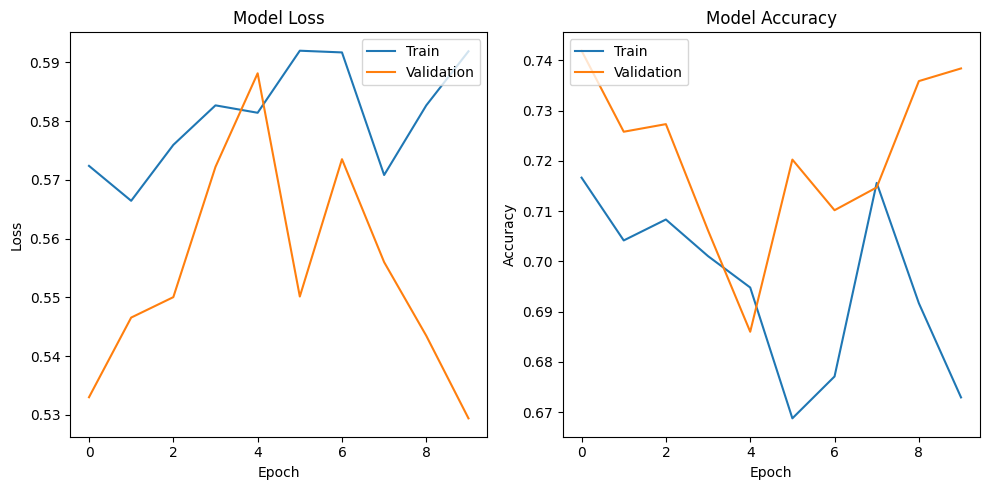

In [35]:
import matplotlib.pyplot as plt

# Training history from model.fit_generator
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=num_epochs, 
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)


# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

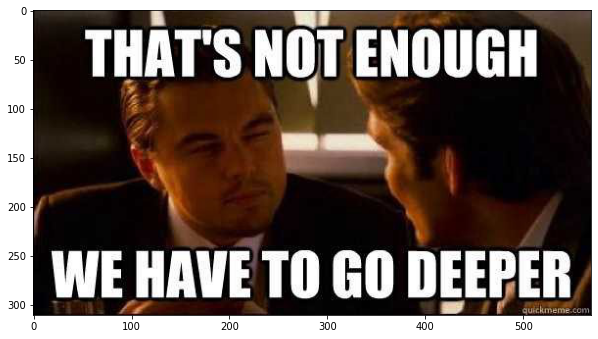

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('/content/drive/My Drive/Deeper.jpeg')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()


Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [ ]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [1]:
# add layers to VGG16:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Load the VGG16 model without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the weights of the VGG16 model
base_model.trainable = False

# Create a new model by adding custom classification layers on top of the VGG16 base
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))  # Assuming binary classification

model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [2]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-5), 
              metrics=['accuracy'])

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Epoch 1/10
25/25 [==============================] - 215s 9s/step - loss: 36.1298 - accuracy: 0.6800 - val_loss: 0.5153 - val_accuracy: 0.8100
Epoch 2/10
25/25 [==============================] - 219s 9s/step - loss: 0.7975 - accuracy: 0.7725 - val_loss: 0.8669 - val_accuracy: 0.6925
Epoch 3/10
25/25 [==============================] - 220s 9s/step - loss: 1.0389 - accuracy: 0.7812 - val_loss: 5.8998 - val_accuracy: 0.5562
Epoch 4/10
25/25 [==============================] - 218s 9s/step - loss: 0.7867 - accuracy: 0.7575 - val_loss: 0.3641 - val_accuracy: 0.8275
Epoch 5/10
25/25 [==============================] - 218s 9s/step - loss: 0.7085 - accuracy: 0.7575 - val_loss: 0.3497 - val_accuracy: 0.8350
Epoch 6/10
25/25 [==============================] - 219s 9s/step - loss: 0.4656 - accuracy: 0.7837 - val_loss: 0.4793 - val_accuracy: 0.8438
Epoch 7/10
25/25 [========

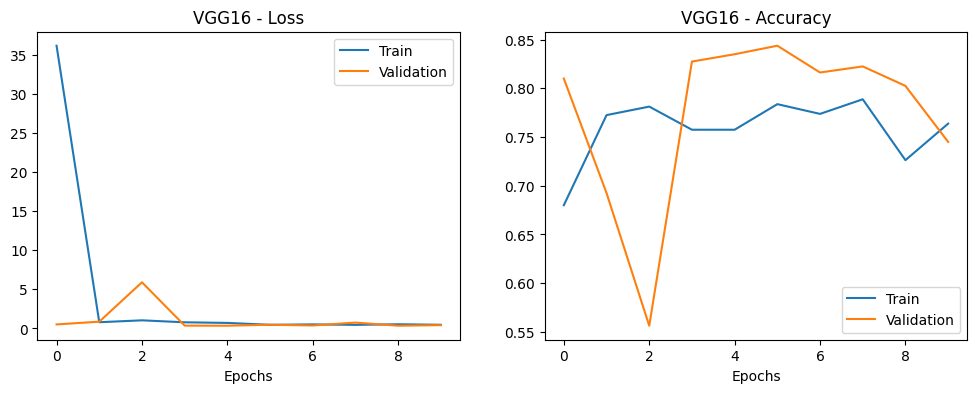

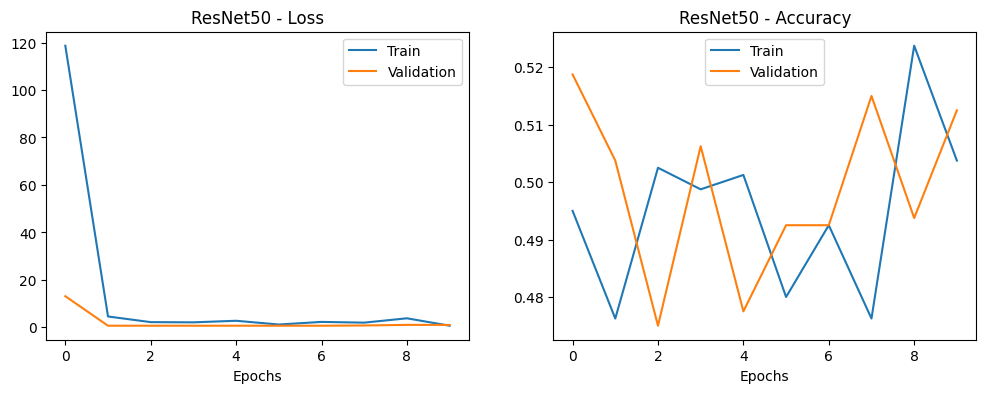

FileNotFoundError: [Errno 2] No such file or directory: 'custom_image.jpg'

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

# Data paths and parameters
train_dir = 'train'
val_dir = 'val'
test_dir = 'test'
img_width, img_height, channels = 150, 150, 3
batch_size = 32  # Reduce batch size
learning_rate = 0.1  # Faster learning rate

# Create data generators
datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = datagen.flow_from_directory(
    train_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    val_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    test_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary'
)

# Build and fit a transfer learning model
def build_and_fit_model(base_model, model_name):
    base_model.trainable = False
    
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        train_generator, steps_per_epoch=25, epochs=10,  # Train for more epochs
        validation_data=val_generator, validation_steps=25
    )
    
    test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
    print(f"{model_name} - Test accuracy: {test_acc * 100:.2f}%")
    
    return model, history

# Build and fit VGG16 model
vgg16_model, vgg16_history = build_and_fit_model(
    VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, channels)), 'VGG16'
)

# Build and fit ResNet50 model
resnet50_model, resnet50_history = build_and_fit_model(
    ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, channels)), 'ResNet50'
)

# Plot Loss and Accuracy graphs
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.xlabel('Epochs')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.xlabel('Epochs')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    plt.show()

plot_history(vgg16_history, 'VGG16')
plot_history(resnet50_history, 'ResNet50')

# Inference function
def predict_image_class(image_path, model, class_names):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Normalize the image
    prediction = model.predict(img)
    predicted_class = class_names[int(round(prediction[0][0]))]
    return predicted_class

class_names = ['cat', 'dog']

predicted_class = predict_image_class(image_path, vgg16_model, class_names)
print(f'Predicted class: {class_names[predicted_class]}')


In [22]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

model = Sequential()

# Add layers to the model
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=12,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/12
15/15 [==============================] - 16s 955ms/step - loss: 0.7127 - accuracy: 0.4625 - val_loss: 0.6904 - val_accuracy: 0.5232
Epoch 2/12
15/15 [==============================] - 14s 962ms/step - loss: 0.6849 - accuracy: 0.5354 - val_loss: 0.6766 - val_accuracy: 0.5393
Epoch 3/12
15/15 [==============================] - 14s 947ms/step - loss: 0.6760 - accuracy: 0.5667 - val_loss: 0.6646 - val_accuracy: 0.6099
Epoch 4/12
15/15 [==============================] - 14s 915ms/step - loss: 0.6759 - accuracy: 0.5562 - val_loss: 0.6611 - val_accuracy: 0.6341
Epoch 5/12
15/15 [==============================] - 14s 926ms/step - loss: 0.6862 - accuracy: 0.6021 - val_loss: 0.6677 - val_accuracy: 0.6099
Epoch 6/12
15/15 [==============================] - 14s 942ms/step - loss: 0.6749 - accuracy: 0.6125 - val_loss: 0.6529 - val_accuracy: 0.6562
Epoch 7/12
15/15 [==============================] - 14s 935ms/step - loss: 0.6488 - accuracy: 0.5958 - val_loss: 0.6525 - val_accuracy: 0.5998

In [23]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

model = Sequential()

# Add layers to the model
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.fit_generator(
    train_generator,
    steps_per_epoch=25,
    epochs=15,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/15
25/25 [==============================] - 23s 814ms/step - loss: 0.7249 - accuracy: 0.5113 - val_loss: 0.6869 - val_accuracy: 0.4929
Epoch 2/15
25/25 [==============================] - 21s 819ms/step - loss: 0.6889 - accuracy: 0.5350 - val_loss: 0.6753 - val_accuracy: 0.6149
Epoch 3/15
25/25 [==============================] - 20s 813ms/step - loss: 0.6702 - accuracy: 0.5638 - val_loss: 0.7293 - val_accuracy: 0.5433
Epoch 4/15
25/25 [==============================] - 19s 773ms/step - loss: 0.6787 - accuracy: 0.5775 - val_loss: 0.6726 - val_accuracy: 0.5675
Epoch 5/15
25/25 [==============================] - 19s 743ms/step - loss: 0.6686 - accuracy: 0.5925 - val_loss: 0.6291 - val_accuracy: 0.6381
Epoch 6/15
25/25 [==============================] - 19s 741ms/step - loss: 0.6555 - accuracy: 0.6225 - val_loss: 0.6318 - val_accuracy: 0.6512
Epoch 7/15
25/25 [==============================] - 20s 809ms/step - loss: 0.6365 - accuracy: 0.6575 - val_loss: 0.6037 - val_accuracy: 0.6764

In [24]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 75.00%


<h1>Part 3</h1>

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data paths and parameters
train_dir = 'train'
val_dir = 'val'
test_dir = 'test'
img_width, img_height, channels = 150, 150, 3
batch_size = 32

# Data generators
datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = datagen.flow_from_directory(train_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')
val_generator = datagen.flow_from_directory(val_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')
test_generator = datagen.flow_from_directory(test_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')

# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=10,
                    validation_data=val_generator, validation_steps=len(val_generator))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test accuracy: {test_acc * 100:.2f}%")


Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Epoch 1/10
625/625 [==============================] - 761s 1s/step - loss: 0.6177 - accuracy: 0.6479 - val_loss: 0.5462 - val_accuracy: 0.7213
Epoch 2/10
625/625 [==============================] - 653s 1s/step - loss: 0.5084 - accuracy: 0.7542 - val_loss: 0.4682 - val_accuracy: 0.7928
Epoch 3/10
625/625 [==============================] - 625s 1000ms/step - loss: 0.4274 - accuracy: 0.8038 - val_loss: 0.4158 - val_accuracy: 0.8165
Epoch 4/10
625/625 [==============================] - 593s 948ms/step - loss: 0.3580 - accuracy: 0.8417 - val_loss: 0.3869 - val_accuracy: 0.8277
Epoch 5/10
625/625 [==============================] - 626s 1s/step - loss: 0.2882 - accuracy: 0.8791 - val_loss: 0.3866 - val_accuracy: 0.8333
Epoch 6/10
625/625 [==============================] - 632s 1s/step - loss: 0.2054 - accuracy: 0.9165 - val_loss: 0.4399 - val_accuracy: 0.8373
Epoch 7/

In this code, we're working on a Convolutional Neural Network (CNN) for binary image classification. CNNs are widely used for image-related tasks because they can automatically learn features from the data. Here's a breakdown of key components:

ImageDataGenerator: It helps with data augmentation and prepares the data for training. Data augmentation involves applying random transformations to the images during training to increase the diversity of the training dataset. This can improve the model's generalization.

Model Architecture: The CNN architecture consists of convolutional layers for feature extraction, pooling layers for dimensionality reduction, and fully connected layers for making predictions. We have specified 3 convolutional layers and a few dense layers in this example. The activation function used here is ReLU (Rectified Linear Unit), which introduces non-linearity to the model.

Compilation: We compile the model using the Adam optimizer and binary cross-entropy loss. The Adam optimizer adapts the learning rate during training, making it converge faster. Binary cross-entropy is a common loss function for binary classification.

Training: The model is trained using the fit method. We specify the number of training epochs and use the validation data to monitor the model's performance during training.

Evaluation: After training, the model is evaluated on the test dataset, and the test accuracy is reported. This accuracy indicates how well the model generalizes to unseen data.

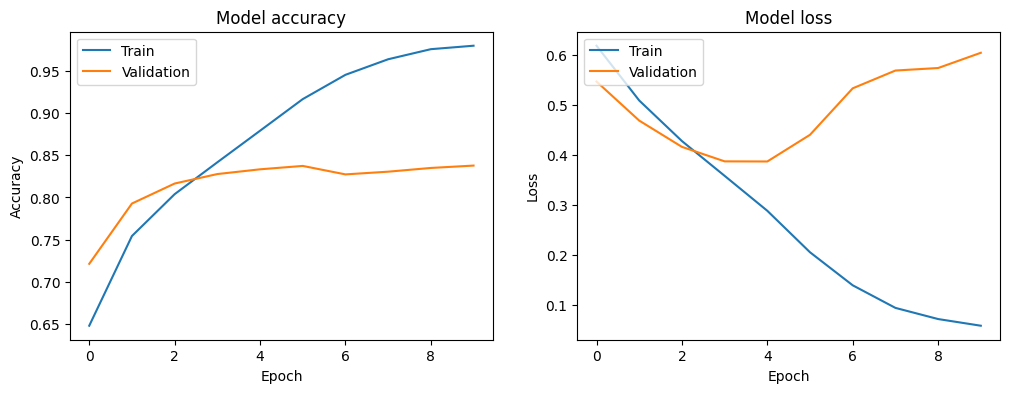

In [26]:
# Plotting the training history
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Call the function to plot the training history
plot_training_history(history)